<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference


## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [1]:
from scipy import stats
dir(stats)

['PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',

#### Scipy stats `norm` (normal distribution)

In [2]:
norm = stats.norm() # parameters of normal distribution, is mean, std. dev, 
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


#### Scipy stats `t` (t - distribution)

In [3]:
t1 = stats.t(5)# 5 is DF "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


In [4]:
round(t1.std() ** 2, 2) == round(t1.var(), 2)

True

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg" align="left"/><div style="clear:both"></div>

*(Picture from [Wikipedia](https://en.m.wikipedia.org/wiki/Student%27s_t-distribution))*

The t-distribution is "normal-ish" - the larger the parameter(which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30) # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

<img alt="William Sealy Gosset" src="https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg" width=400 height=450 align="left"/><div style="clear:both"></div>

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best way to yield barley. He's also proof that, even 100 years age, you don't need official credentials to do real data science!

# What is Inferential Statistics?

![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

![Variance Equation](https://standard-deviation-calculator.com/wp-content/uploads/2018/03/sample-variance-formula-descriptive-statistics-54-638-cb1374419364.jpg)

## Pancakes !!! 

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="images/pancakes.jpg" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Why do we use the t-distribution in Hypothesis Tests?
* [Part 3](#p2): Student's T Test
* [Part 4](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [6]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [7]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [8]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

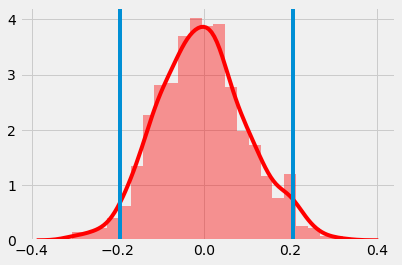

In [9]:
%matplotlib inline
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the population mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution and spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean falls within a certain $\alpha$ probability of the mean of means.

In [10]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

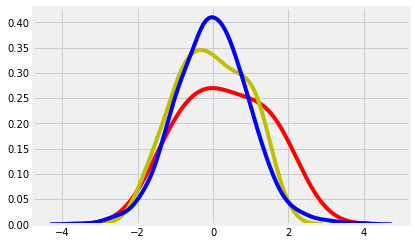

In [11]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [12]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: 0.3213415045892408
Standard Deviation: 1.0483537752850924
Variance: 1.099045638154506
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.042538048878359457
Standard Deviation: 0.9261921453235186
Variance: 0.8578318900589816
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.01416881097482246
Standard Deviation: 0.9788184009067794
Variance: 0.9580854619537047


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [13]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

 Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. 

In [14]:
mu1 = 180
sigma1 = 5
n1 = 1000
sample1 = np.random.normal(mu1, sigma1, n1)

mu2 = 178.5
sigma2 = 4.25
n2 = 800
sample2 = np.random.normal(mu2, sigma2, n2)

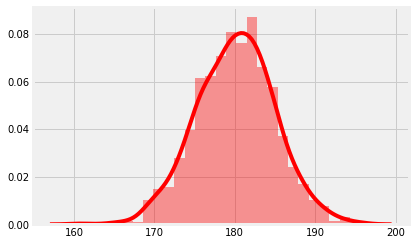

In [15]:
ax = sns.distplot(sample1, color='r')

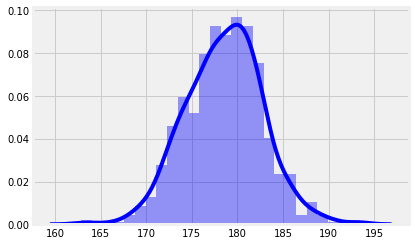

In [16]:
ax = sns.distplot(sample2, color='b')

## The Four Parts of a T-test

### Before:

1) Null Hypothesis: "The Boring Hypothesis", "The default state of the world"

 - The cooking times between the two burners is the same: $\mu_{1} = \mu_{2}$

2) Alternative Hypothesis: "The opposite of the null hypothesis"

- The cooking times are different $\mu_{1} \neq \mu_{2}$

3) Confidence Level: 95%

**Confidence level of 95%** (reach an incorrect conclusion only 5% of the time)

p < 1 - Confidence Level

1 - Confidence Level = $\alpha$

- I reject the null hypothesis when P-value < alpha (1 - Confidence Level)

In [17]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=7.169773948696279, pvalue=1.0925180956795187e-12)

### After:

4) T-statistic: 6.362

5) P-value: .000000000251

What is the t-statistic?: ~Roughly the number of standard deviations away from the mean, that corresponds to the differences in means that we have observed given their sample sizes. 

What is the P-value: The probability that the difference that we have observed (The t-statist that we get) could have happened by random chance. 

### Interpretation: 

Due to calculating a t-statistic of 6.362 which corresponds to a p-value of .000000000251, we reject the null hypothesis that the mean of cooking times between the two burners is equal, and suggest the alternative hypothesis that they are different. 



# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means